In [2]:

import sys
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

project_root = os.path.abspath("../../")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(sys.path)
print(project_root)

import exp_driver.experiment as E

['/data/marci/mjakowsk/EDS4AI/DeficitProject', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python311.zip', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11/lib-dynload', '', '/home/mjakowsk/.local/lib/python3.11/site-packages', '/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11/site-packages']
/data/marci/mjakowsk/EDS4AI/DeficitProject


In [4]:
all_accs = []
all_epochs = []
all_types = []
all_losses = []


In [5]:


exp_ids = ["EuFhthOq", "Myr3BELE", "nrNcwJKp","U9hRX5Fo"]
id_map = {"EuFhthOq" : "SGD deficit 300 epochs",
           "Myr3BELE" : "SGD deficit 450 epochs",
            "nrNcwJKp" : "Adam deficit 300 epochs",
            "U9hRX5Fo" : "Adam deficit 450 epochs"}

dir_map = {"EuFhthOq" : "clay_blur", "Myr3BELE":"clay_blur", "nrNcwJKp":"blur_weights","U9hRX5Fo":"blur_weights"}


for exp_id in exp_ids:
    dir = dir_map[exp_id]
    config = E.get_config(exp_id=exp_id, dir=dir)    
    tr_loss, _, te_loss, exp_accuracies = E.get_data(exp_id=exp_id, dir=dir)

    num_points = len(exp_accuracies)

    all_accs = all_accs + exp_accuracies
    all_epochs = all_epochs + list(range(num_points))
    all_types = all_types + [id_map[exp_id] for i in range(num_points)]
    all_losses = all_losses + tr_loss



In [6]:
epochs = list(range(550))
print(len(epochs))


df1 = pd.DataFrame({
    "Accuracy" : all_accs,
    "Epoch" : all_epochs,
    "Type" : all_types,
    "Loss" :all_losses
})

550


In [7]:
print(all_accs[1799])

88.67


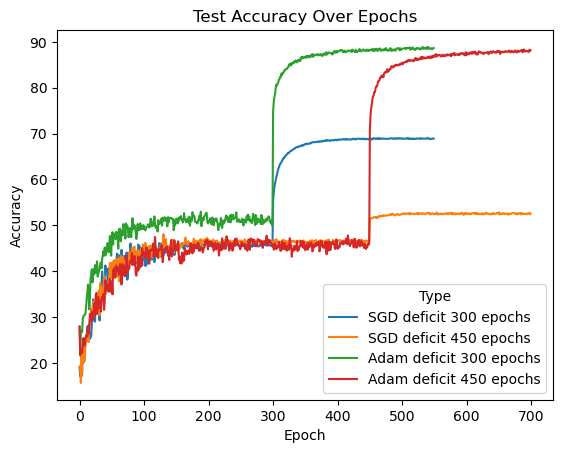

In [8]:
s = sns.lineplot(df1, x="Epoch", y= "Accuracy", hue="Type").set_title("Test Accuracy Over Epochs")

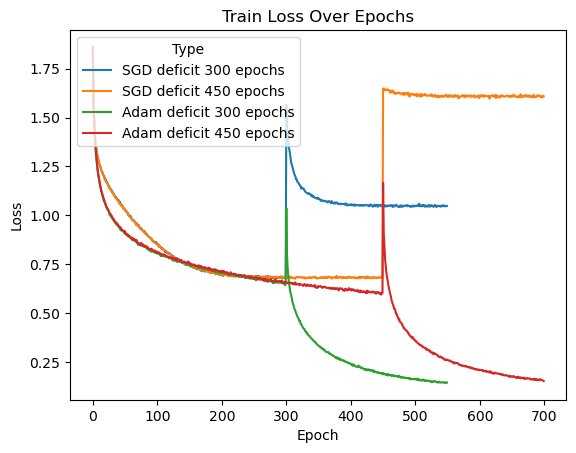

In [9]:

s = sns.lineplot(df1, x="Epoch", y= "Loss", hue="Type").set_title("Train Loss Over Epochs")

In [10]:

#all_accs = []
#all_epochs = []
#all_types = []
#all_losses = []

#exp_ids = ["nrNcwJK","U9hRX5Fo"]
##exp_ids = ["EuFhthOq", "Myr3BELE"]
#id_map = {"nrNcwJK" : "deficit 300 epochs",
           #"U9hRX5Fo" : "deficit 450 epochs"}

#dir = "blur_weights"

#for exp_id in exp_ids:
    #config = E.get_config(exp_id=exp_id, dir=dir)    
    #tr_loss, _, _, exp_accuracies = E.get_data(exp_id=exp_id, dir=dir)

    #num_points = len(exp_accuracies)

    #all_accs = all_accs + exp_accuracies
    #all_epochs = all_epochs + list(range(num_points))
    #all_types = all_types + [id_map[exp_id] for i in range(num_points)]
    #all_losses = all_losses + tr_loss

#df2 = pd.DataFrame({
    #"Accuracy" : all_accs,
    #"Epoch" : all_epochs,
    #"Type" : all_types,
    #"Loss" :all_losses
#})